In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data = data.drop('Id', axis=1) 

In [5]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Model

In [6]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
inputs = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [9]:
target = data['Species']

# Splitting

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3, random_state=10)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# k-nearest neighbors algorithm

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

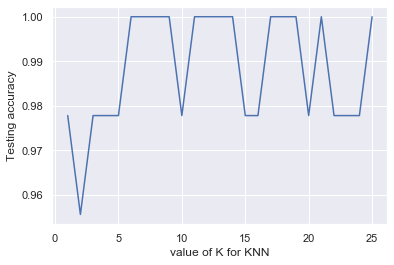

In [15]:
plt.plot(k_range, scores_list)
plt.xlabel('value of K for KNN')
plt.ylabel('Testing accuracy')

In [16]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [18]:
knn_pred = knn.predict(x_test)

In [19]:
confusion_matrix(y_test, knn_pred)


array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]], dtype=int64)

In [22]:
print('accuracy:',accuracy_score(y_test, knn_pred))
print('precision:',precision_score(y_test, knn_pred, average=None))
print('recall:',recall_score(y_test, knn_pred, average=None))
print('F1-score:', f1_score(y_test, knn_pred, average=None))

accuracy: 1.0
precision: [1. 1. 1.]
recall: [1. 1. 1.]
F1-score: [1. 1. 1.]


In [23]:
print(classification_report(y_test, knn_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


c:\Users\Vatsu.Daita\.conda\envs\myenv\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [32]:
dtree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

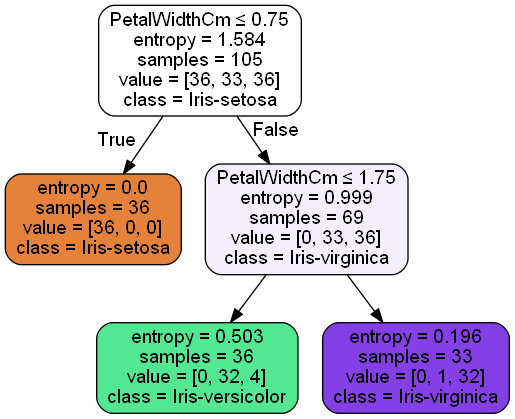

In [33]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, 
                feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
dtree_pred = dtree.predict(x_test)

In [35]:
confusion_matrix(y_test, dtree_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

In [36]:
print('accuracy:',accuracy_score(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

accuracy: 0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

